# Определение стоимости автомобилей

Сервис по продаже автомобилей с пробегом разрабатывает приложение для привлечения новых клиентов. В нём можно быстро узнать рыночную стоимость своего автомобиля. В вашем распоряжении исторические данные: технические характеристики, комплектации и цены автомобилей. Необходимо построить модель для определения стоимости. 

Заказчику важны:

- качество предсказания;
- скорость предсказания;
- время обучения.

* `DateCrawled` — дата скачивания анкеты из базы
* `Price` — цена (евро)
* `VehicleType` — тип автомобильного кузова
* `RegistrationYear` — год регистрации автомобиля
* `Gearbox` — тип коробки передач
* `Power` — мощность (л. с.)
* `Model` — модель автомобиля
* `Kilometer` — пробег (км)
* `RegistrationMonth` — месяц регистрации автомобиля
* `FuelType` — тип топлива
* `Brand` — марка автомобиля
* `NotRepaired` — была машина в ремонте или нет
* `DateCreated` — дата создания анкеты
* `NumberOfPictures` — количество фотографий автомобиля
* `PostalCode` — почтовый индекс владельца анкеты (пользователя)
* `LastSeen` — дата последней активности пользователя

#### План работы над проектом :

1. [Подготовка данных](#Step_1)
2. [Обучение моделей](#Step_2)
3. [Анализ моделей](#Step_3)
4. [Вывод](#Step_4)

## Подготовка данных <a id="Step_1"></a>

Загрузим всё необходимое для работы

In [1]:
import pandas as pd

from numpy import mean
from numpy import std

from matplotlib import pyplot

from sklearn.preprocessing import OrdinalEncoder

from sklearn.model_selection import train_test_split

from sklearn.metrics import mean_squared_error

from sklearn.linear_model import LinearRegression

from lightgbm import LGBMRegressor

from sklearn.model_selection import cross_val_score

from sklearn.model_selection import RepeatedKFold


In [2]:
df = pd.read_csv('/datasets/autos.csv')

In [3]:
pd.options.display.max_columns = None

In [4]:
df

,DateCrawled,Price,VehicleType,RegistrationYear,Gearbox,Power,Model,Kilometer,RegistrationMonth,FuelType,Brand,NotRepaired,DateCreated,NumberOfPictures,PostalCode,LastSeen
0,2016-03-24 11:52:17,480,NaN,1993,manual,0,golf,150000,0,petrol,volkswagen,NaN,2016-03-24 00:00:00,0,70435,2016-04-07 03:16:57
1,2016-03-24 10:58:45,18300,coupe,2011,manual,190,NaN,125000,5,gasoline,audi,yes,2016-03-24 00:00:00,0,66954,2016-04-07 01:46:50
2,2016-03-14 12:52:21,9800,suv,2004,auto,163,grand,125000,8,gasoline,jeep,NaN,2016-03-14 00:00:00,0,90480,2016-04-05 12:47:46
3,2016-03-17 16:54:04,1500,small,2001,manual,75,golf,150000,6,petrol,volkswagen,no,2016-03-17 00:00:00,0,91074,2016-03-17 17:40:17
4,2016-03-31 17:25:20,3600,small,2008,manual,69,fabia,90000,7,gasoline,skoda,no,2016-03-31 00:00:00,0,60437,2016-04-06 10:17:21
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
354364,2016-03-21 09:50:58,0,NaN,2005,manual,0,colt,150000,7,petrol,mitsubishi,yes,2016-03-21 00:00:00,0,2694,2016-03-21 10:42:49
354365,2016-03-14 17:48:27,2200,NaN,2005,NaN,0,NaN,20000,1,NaN,sonstige_autos,NaN,2016-03-14 00:00:00,0,39576,2016-04-06 00:46:52
354366,2016-03-05 19:56:21,1199,convertible,2000,auto,101,fortwo,125000,3,petrol,smart,no,2016-03-05 00:00:00,0,26135,2016-03-11 18:17:12
354367,2016-03-19 18:57:12,9200,bus,1996,manual,102,transporter,150000,3,gasoline,volkswagen,no,2016-03-19 00:00:00,0,87439,2016-04-07 07:15:26


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 354369 entries, 0 to 354368
Data columns (total 16 columns):
DateCrawled          354369 non-null object
Price                354369 non-null int64
VehicleType          316879 non-null object
RegistrationYear     354369 non-null int64
Gearbox              334536 non-null object
Power                354369 non-null int64
Model                334664 non-null object
Kilometer            354369 non-null int64
RegistrationMonth    354369 non-null int64
FuelType             321474 non-null object
Brand                354369 non-null object
NotRepaired          283215 non-null object
DateCreated          354369 non-null object
NumberOfPictures     354369 non-null int64
PostalCode           354369 non-null int64
LastSeen             354369 non-null object
dtypes: int64(7), object(9)
memory usage: 43.3+ MB


In [6]:
df.describe()

,Price,RegistrationYear,Power,Kilometer,RegistrationMonth,NumberOfPictures,PostalCode
count,354369.000000,354369.000000,354369.000000,354369.000000,354369.000000,354369.0,354369.000000
mean,4416.656776,2004.234448,110.094337,128211.172535,5.714645,0.0,50508.689087
std,4514.158514,90.227958,189.850405,37905.341530,3.726421,0.0,25783.096248
min,0.000000,1000.000000,0.000000,5000.000000,0.000000,0.0,1067.000000
25%,1050.000000,1999.000000,69.000000,125000.000000,3.000000,0.0,30165.000000
50%,2700.000000,2003.000000,105.000000,150000.000000,6.000000,0.0,49413.000000
75%,6400.000000,2008.000000,143.000000,150000.000000,9.000000,0.0,71083.000000
max,20000.000000,9999.000000,20000.000000,150000.000000,12.000000,0.0,99998.000000


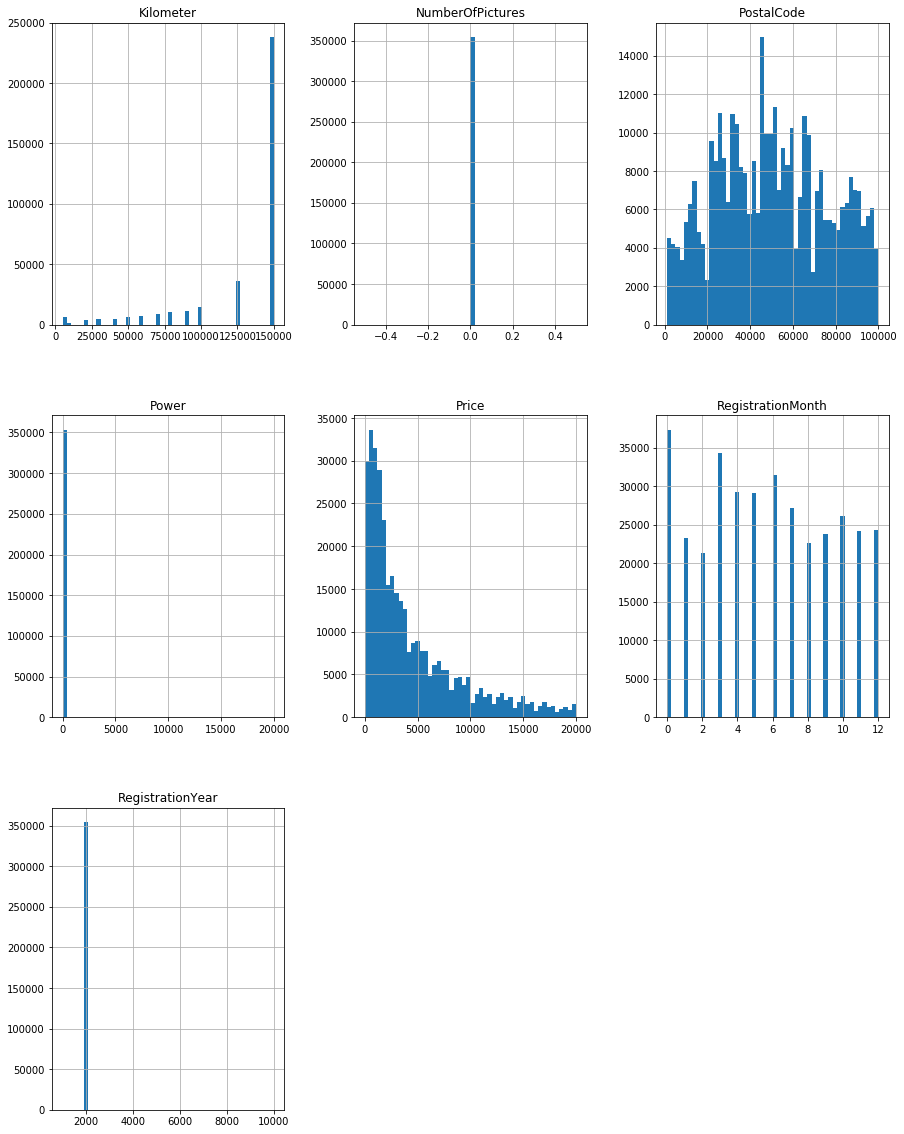

In [7]:
df.hist(bins = 50, figsize = (15,20));

Прежде чем перейти к дальнейшему рассмотрению, приведём названия признаков к нижнему регистру

In [8]:
df.columns = map(str.lower, df.columns)

Рассмотрим каждый признак по отдельности

`DateCrawled` — дата скачивания анкеты из базы

In [9]:
print('Пропусков:', df['datecrawled'].isna().sum())

Пропусков: 0


Загадка, как может повлиять дата скачивания анкеты из базы на прогноз цены автомобиля. Уберём данный признак. Была бы это дата продажи автомобиля - да, можно было бы связать с датой создания анкеты на продажу, а разницу, то есть время продажи, использовать как дополнительный признак. Но нет, это просто время скачивания... А когда продали, когда скачали - пади разбери)

In [10]:
df.drop('datecrawled', axis = 1, inplace = True)

`Price` — цена (евро)

Итак, наш целевой признак, святая святых, пристально ознакомимся, что всё таки имеем. 

Метод `describe` показал нам, что минимальная цена равна 0 ... Что ж, посмотрим сколько машин у нас, вроде как, отдали задаром. 

In [11]:
len(df[df['price'] == 0])

10772

In [12]:
round((len(df[df['price'] == 0]) / len(df)),4) * 100

3.04

Изобретать велосипед здесь нет смысла. Даже, если это не сбой при обработке данных и не полный аналог `Nan`, то наша модель должна будет предсказывать цену, а не альтруистические порывы, даже для самой последней колымаги. </b> 

Таким образом, просто удалим объекты с нулевой ценой, тем более, что таковых, всего 3,04 %.

In [13]:
df = df[df['price'] > 0]

Хорошо, едем дальше. С нулями разобрались, а что у нас чуть больше 0, есть ли болиды за 100 и меньше?

In [14]:
len(df[df['price'] < 100])

2542

Хорошо... А 200? 

In [15]:
len(df[df['price'] < 200])

6690

500

In [16]:
len(df[df['price'] < 500])

25282

...

Так. Что двигало людьми при выставлении таких цен, конечно, отличный вопрос, особенно с учётом специфики европейского рынка (судя по валюте), правил утилизации и прочих радостей. Но, из имеющихся у нас признаков, мы предполагаем, что всё таки имеем дело с автомобилями на ходу, пусть и, порой, не первой свежести и весьма поношенных, однако рабочих. И в этом случае, даже для рынка российского, это была бы цена, мягко говоря, сомнительная.

Наша задача помочь сервису выдавать клиентам более-менее адекватную рекомендацию по рынку, а подобного рода "хитрые умозаключения" с ценой меньше 500 будут эту самую рекомендацию заметно занижать. 

Может быть, всё таки речь об авто доживающих последние часы? Оценим. 

In [17]:
df_price_500 = df[df['price'] < 500]

Для быстрого анализа, нам, конечно, в данном случае, все признаки ни к чему. Для понимания имеем ли мы дело с металлоломом или нет, достаточно будет нескольких. 

In [18]:
df_price_500 = df_price_500[['price','registrationyear','kilometer']]

In [19]:
df_price_500.groupby('registrationyear')['kilometer'].mean();

Вот оно что, тут и невменяемые значеням по датам подъехали. Хорошо, параллельно и с этим разберёмся. Вопросов к такой информации становится всё больше. 

In [20]:
df_price_500 = (df_price_500
                .query('registrationyear > 1900 and registrationyear < 2021')) 

In [21]:
(df_price_500
 .groupby('registrationyear')['kilometer','price']
 .agg(['mean','count'])).head(30);

In [22]:
(df_price_500
 .groupby('registrationyear')['kilometer','price']
 .agg(['mean','count'])).tail(30);

Итак, чтобы не углубляться ещё больше в дебри, примем относительно ценовой политики следующий постулаты: если цена автомобиля меньше 500 евро, год выпуска больше 2005, а пробег меньше 100000, то в рамках нашей модели будем считать такие объекты нерепрезентативными, а следовательно подлежащими исключению из фрейма. 

Применим полученные выше результаты

In [23]:
df = df.query('registrationyear > 1900 and registrationyear < 2020')

In [24]:
df_1 = df
df_1 = df_1.query('price <= 500')
df_1 = df_1.query('registrationyear >= 2005')
df_1 = df_1.query('kilometer <= 100000')

In [25]:
list_1 = df_1.index

In [26]:
df = df.query("index not in @list_1")

Также обратим внимание на год регистрации авто. Последняя дата регистрации на сайте 2016, а последняя дата регистрации авто 2019... Оценим, сколько таким сомнительных цифр в нашем распоряжении.

In [27]:
df.query('registrationyear > 2016').shape

(13567, 15)

Не мало. Не хотелось бы их терять. Поэтому допустим, что всё старше 2016 года - это ошибка ввода пользователя, и, следовательно, заменим подобные цифры этим 2016 годом. 

In [28]:
df['registrationyear'].where(df['registrationyear'] <= 2016, 2016, inplace = True)

Посмотрим количество пропусков.

In [29]:
print('Пропусков:', df['price'].isna().sum())

Пропусков: 0


`VehicleType` — тип автомобильного кузова

In [30]:
df['vehicletype'].value_counts()

sedan          89338
small          77928
wagon          63671
bus            28330
convertible    19849
coupe          15618
suv            11768
other           3068
Name: vehicletype, dtype: int64

In [31]:
print('Пропусков:', df['vehicletype'].isna().sum())

Пропусков: 32830


Терять почти 10% данных нет никакого желания. Пожалуй, конкретно в этом случае, допустимо будет пропущенные значения поместить в категорию `other`.

In [32]:
df['vehicletype'].fillna(value = 'other',inplace = True);

In [33]:
print('Пропусков:', df['vehicletype'].isna().sum())

Пропусков: 0


`RegistrationYear` — год регистрации автомобиля

In [34]:
print('Пропусков:', df['registrationyear'].isna().sum())

Пропусков: 0


`Gearbox` — тип коробки передач

In [35]:
df['gearbox'].value_counts()

manual    260908
auto       64762
Name: gearbox, dtype: int64

In [36]:
print('Пропусков:', df['gearbox'].isna().sum())

Пропусков: 16730


Здесь поступим также как и с кузовом. Чтобы лишний раз не терять данные, допустим, что это не пропуски, а, возможно, просто другие виды коробок, которые по каким-то причинам не были корректно отражены. Вместо пропусков создадим третью категорию `other`.

In [37]:
df['gearbox'].fillna(value = 'other', inplace = True)

`Power` — мощность (л. с.)

In [38]:
df['power'].value_counts().sort_index()

0        35638
1           23
2            9
3            8
4           30
         ...  
17932        1
19208        1
19211        1
19312        1
20000        1
Name: power, Length: 698, dtype: int64

Так, по поводу верхнего предела поступим просто, предположим, что в данных по продажам присутствуют ультрамощные спорткары и установим верхний порог в 1500 л с, остальное уберём. 

In [39]:
df.query('power >= 1500').shape

(189, 15)

Приемлимо. Убираем. 

In [40]:
df.query('power <= 1500', inplace = True)

А вот с нижним - вопрос. Посмотрим сколько у нас машин с показателем меньше 20 (на таком фоне даже многострадальный матиз смотрится уверенно). 

In [41]:
df.query('power <= 20').shape

(36048, 15)

Солидно. Учитывая контекст, об удалении, разумеется, речь не идёт. Вопрос, что делать с нулями: оставить или заменить. Где у нас будет искажение? В нуле? В середине? Или в медиане? 

Нет, руки, конечно, чешутся избавиться от явно странных значений, но, если считать, что это не сбой при обработке данных, а покупателей рук дело, то ситуация может повториться и в этом случае модель должна быть готова что-то отрекомендовать. В общем, нули не тронем...

In [42]:
print('Пропусков:', df['power'].isna().sum())

Пропусков: 0


`Model` — модель автомобиля

In [43]:
df['model'].value_counts().sort_values(ascending = False).head(10);

In [44]:
len(df['model'].value_counts())

250

In [45]:
print('Пропусков:', df['model'].isna().sum())

Пропусков: 17205


И снова, чтобы избежать потери данных, прибегнем к созданию дополнительной категории `other`.

In [46]:
df['model'].fillna(value = 'other', inplace = True)

`Kilometer` — пробег (км)

In [47]:
print('Пропусков:', df['kilometer'].isna().sum())

Пропусков: 0


`RegistrationMonth` — месяц регистрации автомобиля

In [48]:
print('Пропусков:', df['registrationmonth'].isna().sum())

Пропусков: 0


`FuelType` — тип топлива

In [49]:
df['fueltype'].value_counts()

petrol      210274
gasoline     97008
lpg           5163
cng            550
hybrid         226
other          158
electric        87
Name: fueltype, dtype: int64

In [50]:
print('Пропусков:', df['fueltype'].isna().sum())

Пропусков: 28749


По старой-доброй пропуски всё туда же, в `other`.

In [51]:
df['fueltype'].fillna(value = 'other', inplace = True)

`Brand` — марка автомобиля

In [52]:
df['brand'].value_counts().head(10)

volkswagen       74191
opel             38377
bmw              35688
mercedes_benz    31265
audi             28483
ford             24303
renault          17306
peugeot          10758
fiat              9290
seat              6695
Name: brand, dtype: int64

In [53]:
print('Пропусков:', df['brand'].isna().sum())

Пропусков: 0


`NotRepaired` — была машина в ремонте или нет

In [54]:
df['notrepaired'].value_counts()

no     243337
yes     33875
Name: notrepaired, dtype: int64

In [55]:
print('Пропусков:', df['notrepaired'].isna().sum())

Пропусков: 65003


Так, ситуация следующая, избавляться от такого количества объектов идея так себе, с другой стороны, утверждать, что машина в ремонте однозначно была или не была, также сомнительно. Поэтому на этом этаме поделим фрейм на 2 части, в кажой из которой отразим на эту проблему две диаметрально противоположные точки зрения: 1 - все пропуски заменим на то, что ремонт был; 2 - удалим все объекты, где отсутствует информация по ремонту.

In [56]:
df_2 = df.copy()

In [57]:
df_2.dropna(subset = ['notrepaired'], inplace = True)

In [58]:
df['notrepaired'].fillna(value = 'yes', inplace = True)

`DateCreated` — дата создания анкеты

In [59]:
print('Пропусков:', df['datecreated'].isna().sum())

Пропусков: 0


Как было уже было написано выше сама по себе дата создания анкеты нам мало, что даёт, поэтому этот признак также под нож.

In [60]:
df.drop('datecreated', axis = 1, inplace = True)

In [61]:
df_2.drop('datecreated', axis = 1, inplace = True)

`NumberOfPictures` — количество фотографий автомобиля

In [62]:
df['numberofpictures'].value_counts()

0    342215
Name: numberofpictures, dtype: int64

Очевидно, что признак, не несущий какой-либо смысловой нагрузки нам вряд ли пригодится

In [63]:
df.drop('numberofpictures', axis = 1, inplace = True)

In [64]:
df_2.drop('numberofpictures', axis = 1, inplace = True)

`PostalCode` — почтовый индекс владельца анкеты (пользователя)

In [65]:
df['postalcode'].value_counts().head(10)

10115    811
65428    604
66333    325
32257    303
44145    301
52525    296
78224    286
13357    282
26789    280
48599    279
Name: postalcode, dtype: int64

In [66]:
df_2.drop('postalcode', axis = 1, inplace = True)

In [67]:
print('Пропусков:', df['postalcode'].isna().sum())

Пропусков: 0


`LastSeen` — дата последней активности пользователя

In [68]:
print('Пропусков:', df['lastseen'].isna().sum())

Пропусков: 0


Пропусков тут, конечно, нет, но сильно сомневаюсь, что дата последней активности пользователя будет положительно сказываться на качестве рекомендуемой цены пользователю вновь прибывшему. Исключим этот признак. 

In [69]:
df.drop('lastseen', axis = 1, inplace = True)

In [70]:
df_2.drop('lastseen', axis = 1, inplace = True)

И в довесок, вернём индексам упорядоченный вид.

In [71]:
df.reset_index(drop = True, inplace = True)

In [72]:
df_2.reset_index(drop = True, inplace = True)

Далее необходимо провести подготовку категориальных признаков к построению модели, но в случае с `LightGBM` делать это совершенно необязательно, так как библиотека работает с ними напрямую.

В качестве эксперимента с помощью техники `Ordinal Encoding` подготовим категориальные признаки к построению модели для `df`, а для другого фрейма `df_2` построим финальную модель без подготовки категориальных признаков. 

In [73]:
columns_enc = ['vehicletype','gearbox','model','fueltype','brand','notrepaired']

In [74]:
encoder = OrdinalEncoder()

In [75]:
df_enc = pd.DataFrame(encoder.fit_transform(df[columns_enc]), 
                            columns=columns_enc)

Отлично, успех налицо. Теперь заменим в нашем датасете соответствующей признаки на преобразованные. 

In [76]:
df.drop(columns_enc, axis = 1, inplace = True)

In [77]:
df = df.join(df_enc)

Итак, посмотрим, что у нас получилось в результате всех манипуляций во время подготовки данных

In [78]:
df

,price,registrationyear,power,kilometer,registrationmonth,postalcode,vehicletype,gearbox,model,fueltype,brand,notrepaired
0,480,1993,0,150000,0,70435,3.0,1.0,116.0,6.0,38.0,1.0
1,18300,2011,190,125000,5,66954,2.0,1.0,166.0,2.0,1.0,1.0
2,9800,2004,163,125000,8,90480,6.0,0.0,117.0,2.0,14.0,1.0
3,1500,2001,75,150000,6,91074,5.0,1.0,116.0,6.0,38.0,0.0
4,3600,2008,69,90000,7,60437,5.0,1.0,101.0,2.0,31.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
342210,1150,2000,0,150000,3,26624,0.0,1.0,249.0,6.0,24.0,0.0
342211,2200,2005,0,20000,1,39576,3.0,2.0,166.0,5.0,33.0,1.0
342212,1199,2000,101,125000,3,26135,1.0,0.0,106.0,6.0,32.0,0.0
342213,9200,1996,102,150000,3,87439,0.0,1.0,224.0,2.0,38.0,0.0


In [79]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 342215 entries, 0 to 342214
Data columns (total 12 columns):
price                342215 non-null int64
registrationyear     342215 non-null int64
power                342215 non-null int64
kilometer            342215 non-null int64
registrationmonth    342215 non-null int64
postalcode           342215 non-null int64
vehicletype          342215 non-null float64
gearbox              342215 non-null float64
model                342215 non-null float64
fueltype             342215 non-null float64
brand                342215 non-null float64
notrepaired          342215 non-null float64
dtypes: float64(6), int64(6)
memory usage: 31.3 MB


Последний штрих.

In [80]:
for column in df.columns:
    df[column] = pd.to_numeric(df[column], downcast= 'integer')

In [81]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 342215 entries, 0 to 342214
Data columns (total 12 columns):
price                342215 non-null int16
registrationyear     342215 non-null int16
power                342215 non-null int16
kilometer            342215 non-null int32
registrationmonth    342215 non-null int8
postalcode           342215 non-null int32
vehicletype          342215 non-null int8
gearbox              342215 non-null int8
model                342215 non-null int16
fueltype             342215 non-null int8
brand                342215 non-null int8
notrepaired          342215 non-null int8
dtypes: int16(4), int32(2), int8(6)
memory usage: 7.2 MB


Мелочь, а приятно) </b>

С другой стороны, как мелочь, почти в 4,5 раза меньше используемой памяти! Здесь - не критично и обратное, а на данных побольше - разница более чем.

Оценим потери информации в результате предобработки по оставшимся признакам. 

In [82]:
round((((354369 - 342215) / 354369) * 100),3)

3.43

Весьма и весьма приемлимые 3,43 %! Выглядит как успех)

*Вывод*

Промежуточные результаты таковы: 
1. Загрузили всё необходимое для работы; 
2. Произвели первичный анализ имеющейся информации;
3. Удалили признаки, информативность которых вызывает большие вопросы; 
4. Выявили аномальные значения и тут же от них избавились; 
5. Восстановили отсутствующие значения; 
6. Осуществили подготовку категориальных признаков с помощью техники `Ordinal Encoding`;
7. Минимизировал количество используемой памяти посредством приведения к соответствующему типу данных (`int32`, `int16`, `int8`);
8. Совопкупные потери объектов для оставшихся признаков по итогам подготовки данных составили `3,43%`.

## Обучение моделей

Начнём, конечно же, с создания базовой модели самой обычной линейной регрессии, без каких-либо изменений гиперпараметров и использования градиентного бустинга.

In [83]:
features= df.drop('price', axis=1)
target = df['price']

In [84]:
features_train, features_valid, target_train, target_valid = train_test_split(
    features, target, test_size= 0.25, random_state=12345)

In [85]:
%%time

model_base = LinearRegression()
model_base.fit(features_train, target_train)
predictions = model_base.predict(features_valid)
rmse_base = mean_squared_error(target_valid, predictions,) ** 0.5

CPU times: user 112 ms, sys: 64.1 ms, total: 176 ms
Wall time: 150 ms


In [86]:
print(rmse_base)

3140.590545681898


Есть контакт, едем дальше.

А дальше у нас `LightGBM`.

Хоть это и не входит в непосредственную задачу этого проекта, но хотелось бы рассмотреть несколько способов обучения моделей:
1. Итеративный метод кросс-валидации `RepeatedKFold`;
2. Классическая кросс-валидация `cross_val_score`;
3. Обычная подставновка обучающих и валидационных признаков после разделения `train_test_split`.

In [87]:
model_lgbm_cv_1 = LGBMRegressor()

In [88]:
cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)

In [89]:
%%time

n_scores = cross_val_score(model_lgbm_cv_1, 
                           features, 
                           target, 
                           scoring='neg_mean_squared_error', 
                           cv=cv, 
                           n_jobs=-1, 
                           error_score='raise')

CPU times: user 19min 59s, sys: 5.72 s, total: 20min 5s
Wall time: 20min 13s


In [90]:
rmse_lgbm_cv_1 = (n_scores * (-1)) ** 0.5

In [91]:
print('RMSE: mean = %.3f std = (%.3f)' % (mean(rmse_lgbm_cv_1), std(rmse_lgbm_cv_1)))

RMSE: mean = 1751.582 std = (17.901)


Результаты не могут не радовать. И величина ошибки существенно меньше по сравнению с базовой, и значения её лежат, так сказать, достаточно кучно. 

Но. 10 минут... Страшно даже представить сколько времени при таком подходе займёт подбор гиперпараметров... Вряд ли это, что нам нужно)

*Обычная кросс-валидация.*

In [92]:
model_lgbm_cv_2 = LGBMRegressor()

In [93]:
%%time

n_scores = cross_val_score(model_lgbm_cv_2, 
                           features, 
                           target, 
                           scoring='neg_mean_squared_error',
                           cv=5,
                           n_jobs=-1,
                           error_score='raise')

CPU times: user 2min 40s, sys: 625 ms, total: 2min 41s
Wall time: 2min 42s


In [94]:
rmse_lgbm_cv_2 = (n_scores * (-1)) ** 0.5

In [95]:
print('RMSE: mean = %.3f std = (%.3f)' % (mean(rmse_lgbm_cv_2), std(rmse_lgbm_cv_2)))

RMSE: mean = 1753.469 std = (11.589)


Другой разговор! В 10 раз быстрее! Среднее значение практически такое же, отклонение меньше, но это прямое следствие количества результатов, которых, очевидно, также меньше.

*Подстановка тренировочных и валидационных признаков после `train_test_split`.*

In [96]:
model_lgbm_cv_3 = LGBMRegressor()

In [97]:
%%time

model_lgbm_cv_3.fit(features_train, target_train)
predictions = model_lgbm_cv_3.predict(features_valid)

CPU times: user 39.7 s, sys: 265 ms, total: 40 s
Wall time: 40.4 s


In [98]:
rmse_lgbm_cv_3 = mean_squared_error(target_valid, predictions,) ** 0.5

In [99]:
rmse_lgbm_cv_3

1748.3659250036394

Так. Собственно, что и говорить, разница по метрике ничтожная, а вот во времени более чем! Очередное ускорение: почти в 6 раз!

Следовательно, с учётом временной специфики самого бустинга, качества полученных результатов и перспективы исследования гиперпараметров, остановимся на последнем варианте.

*Изменение гиперпараметров моделей*

Теперь займёмся гиперпараметрами. Исследуем следующие из них:
1. Количество деревьев;
2. Глубина дерева;
3. Скорость обучения;
4. Тип бустинга.

*Количество деревьев.*

In [100]:
def get_models():
    models = dict()
    trees = [100, 200, 300, 400, 500, 600, 700, 800, 900, 1000]
    for n in trees:
        models[str(n)] = LGBMRegressor(n_estimators=n)
    return models

In [101]:
def evaluate_model(model):
    model.fit(features_train, target_train)
    predictions = model.predict(features_valid)
    rmse = mean_squared_error(target_valid, predictions,) ** 0.5
    return rmse

In [102]:
models = get_models()

In [103]:
for name, model in models.items():
    rmse = evaluate_model(model)
    print('>%s %.3f' % (name, mean(rmse)))

>100 1748.366
>200 1690.142
>300 1659.823
>400 1639.861
>500 1627.642
>600 1618.452
>700 1611.051
>800 1603.012
>900 1597.179
>1000 1593.498


*Глубина дерева.*

In [104]:
def get_models():
    models = dict()
    for i in range(1,11):
        models[str(i)] = LGBMRegressor(max_depth = i, num_leaves = 2**i)
    return models

In [105]:
def evaluate_model(model):
    model.fit(features_train, target_train)
    predictions = model.predict(features_valid)
    rmse = mean_squared_error(target_valid, predictions,) ** 0.5
    return rmse

In [106]:
models = get_models()

In [107]:
for name, model in models.items():
    rmse = evaluate_model(model)
    print('>%s %.3f' % (name, mean(rmse)))

>1 2528.422
>2 2118.912
>3 1957.472
>4 1858.834
>5 1792.910
>6 1739.755
>7 1692.907
>8 1653.689
>9 1632.577
>10 1610.201


*Скорость обучения.*

In [108]:
def get_models():
    models = dict()
    rates = [0.0001, 0.001, 0.01, 0.1, 1.0]
    for r in rates:
        key = '%.4f' % r
        models[key] = LGBMRegressor(learning_rate = r)
    return models

In [109]:
def evaluate_model(model):
    model.fit(features_train, target_train)
    predictions = model.predict(features_valid)
    rmse = mean_squared_error(target_valid, predictions,) ** 0.5
    return rmse

In [110]:
models = get_models()

In [111]:
for name, model in models.items():
    rmse = evaluate_model(model)
    print('>%s %.3f' % (name, mean(rmse)))

>0.0001 4474.423
>0.0010 4202.607
>0.0100 2678.310
>0.1000 1748.366
>1.0000 1753.015


*Тип бустинга.*

In [112]:
def get_models():
    models = dict()
    types = ['gbdt', 'dart', 'goss']
    for t in types:
        models[t] = LGBMRegressor(boosting_type=t)
    return models

In [113]:
def evaluate_model(model):
    model.fit(features_train, target_train)
    predictions = model.predict(features_valid)
    rmse = mean_squared_error(target_valid, predictions,) ** 0.5
    return rmse

In [114]:
models = get_models()

In [115]:
for name, model in models.items():
    rmse = evaluate_model(model)
    print('>%s %.3f' % (name, mean(rmse)))

>gbdt 1748.366
>dart 2002.890
>goss 1715.076


Теперь объедим лучшее из гиперпараметров, что нам удалось получить, в одну модель.

In [116]:
best_model_1 = LGBMRegressor(n_estimators = 1000, 
                           max_depth = 10, 
                           num_leaves = 20, 
                           learning_rate = 1,
                           boosting_type = 'goss')

In [117]:
%%time

best_model_1.fit(features_train, target_train)
predictions = best_model_1.predict(features_valid)

CPU times: user 1min 52s, sys: 497 ms, total: 1min 53s
Wall time: 1min 54s


In [118]:
best_rmse_1 = mean_squared_error(target_valid, predictions,) ** 0.5

In [119]:
best_rmse_1

1.683131561015067e+39

Дааа, результат превзошёл все ожидания. Вернём тип бустинга на исходные.

In [120]:
best_model_2 = LGBMRegressor(n_estimators = 1000, 
                           max_depth = 10, 
                           num_leaves = 20, 
                           learning_rate = 1)                           

In [121]:
%%time

best_model_2.fit(features_train, target_train)
predictions = best_model_2.predict(features_valid)

CPU times: user 4min 37s, sys: 1.35 s, total: 4min 39s
Wall time: 4min 41s


In [122]:
best_rmse_2 = mean_squared_error(target_valid, predictions,) ** 0.5

In [123]:
best_rmse_2

1795.6261298894788

Многовато. Попробуем убрать время обучения.

In [124]:
best_model_3 = LGBMRegressor(n_estimators = 1000, 
                           max_depth = 10, 
                           num_leaves = 20) 

In [125]:
%%time

best_model_3.fit(features_train, target_train)
predictions = best_model_3.predict(features_valid)

CPU times: user 12min 23s, sys: 3.88 s, total: 12min 26s
Wall time: 12min 31s


In [126]:
best_rmse_3 = mean_squared_error(target_valid, predictions,) ** 0.5

In [127]:
best_rmse_3

1617.873559650489

Уберём листья)

In [128]:
best_model_4 = LGBMRegressor(n_estimators = 1000, 
                           max_depth = 10) 

In [129]:
%%time

best_model_4.fit(features_train, target_train)
predictions = best_model_4.predict(features_valid)

CPU times: user 6min 26s, sys: 1.88 s, total: 6min 28s
Wall time: 6min 31s


In [130]:
best_rmse_4 = mean_squared_error(target_valid, predictions,) ** 0.5

In [131]:
best_rmse_4

1596.9138573386192

Вот. Уже похоже на правду. И напоследок оставим единственный гиперпараметр.

In [132]:
best_model_5 = LGBMRegressor(n_estimators = 1000) 

In [133]:
%%time

best_model_5.fit(features_train, target_train)
predictions = best_model_5.predict(features_valid)

CPU times: user 7min 22s, sys: 2.06 s, total: 7min 24s
Wall time: 7min 28s


In [134]:
best_rmse_5 = mean_squared_error(target_valid, predictions,) ** 0.5

In [135]:
best_rmse_5

1593.4978171028338

Теперь, получив лучшую модель, подставим в неё значения второго фрейма, чтобы сравнить результат.

In [143]:
features_2= df_2.drop('price', axis=1)
target_2 = df_2['price']

In [144]:
features_train_2, features_valid_2, target_train_2, target_valid_2 = train_test_split(
    features_2, target_2, test_size= 0.25, random_state=12345)

In [145]:
best_model_6 = LGBMRegressor(n_estimators = 1000) 

In [146]:
cat_features = ['vehicletype', 'gearbox', 'model', 'fueltype', 'notrepaired', 'brand']

In [147]:
df_2[cat_features] = df_2[cat_features].astype('category')

In [149]:
%%time

best_model_6.fit(features_train_2, 
                   target_train_2,
                   categorical_feature = cat_features, 
                   verbose=10)
predictions = best_model_6.predict(features_valid_2)

CPU times: user 3min 46s, sys: 1.24 s, total: 3min 47s
Wall time: 3min 49s


In [150]:
best_rmse_6 = mean_squared_error(target_valid_2, predictions,) ** 0.5

In [151]:
best_rmse_6

1533.28731995856

Успех! 

## Анализ моделей

Итак, для наглядности сведём полученные данные в одну таблицу.

In [155]:
list_results = [
  ['base_model', rmse_base, 0.2],
  ['model_lgbm_cv_1', mean(rmse_lgbm_cv_1), 637],
  ['model_lgbm_cv_2', mean(rmse_lgbm_cv_2), 62],
  ['model_lgbm_cv_3', mean(rmse_lgbm_cv_3), 11],
  ['best_model_2', best_rmse_2, 56], 
  ['best_model_3', best_rmse_3, 65],
  ['best_model_4', best_rmse_4, 72],
  ['best_model_5', best_rmse_5, 72],
  ['best_model_6', best_rmse_6, 72]]


In [156]:
df_results = pd.DataFrame(list_results, columns = ['name','rmse','time'])

In [157]:
df_results

,name,rmse,time
0,base_model,3140.590546,0.2
1,model_lgbm_cv_1,1751.582322,637.0
2,model_lgbm_cv_2,1753.468827,62.0
3,model_lgbm_cv_3,1748.365925,11.0
4,best_model_2,1795.626130,56.0
5,best_model_3,1617.873560,65.0
6,best_model_4,1596.913857,72.0
7,best_model_5,1593.497817,72.0
8,best_model_6,1533.287320,72.0


Проанализируем результаты в порядке их получения:
1. `base_model` - наша базовая модель. Обычная линейная регрессия. Результаты соответствущие. Больших надежд тут не было изначально, но будет с чем сравнить;
2. `model_lgbm_cv_1` - с этой модели и далее будет только градиентный бустинг. Конретно в этом случае добавляем ещё итеративную кросс-валидацию. Результат ощутимо лучше по качеству, а вот время улетело в космос. Естественно не наш вариант;
3. `model_lgbm_cv_2` - аналогичная модель, только с обычной кросс-валидацией. Существенно быстрее, качество такое же. Выглядит убедительно;
4. `model_lgbm_cv_3` - отказываемся от игр с кросс-валидацией. Получаем тоже самое качество, но снова в разы быстрее! Именно с таким подход обучению модели дальше будем исследовать гиперпараметры;
5. `best_model_1` - первая модель, которая вобрала в себя все, до этого показавшие себя по отдельности прекрасно, гиперпараметры, даже не попала в таблицу из-за своей вселенский размеров ошибки;
6. `best_model_2` - убрали измения типа бустинга, ситуация стабилизировалась, но ошибка велика. Больше даже простой модели с бустингом, не говоря уже о гиперпараметрах;
7. `best_model_3` - со скоростью также обучения также прощаемся, чуть растёт время, а ошибка наоброт - уменьшается;
8. `best_model_4` - убираем листья, и снова небольшой рост по качеству и по времени;
9. `best_model_5` - и наконец наш финалист, лучшая модель на первом фрейме `df`! Оставляем только `n_estimators = 1000` и получаем тоже время и совсем немного лучшее качество. 
10. `best_model_6` - но как выяснилось и не финалист вовсе) если подставить в модель второй фрейм `df_2`, то результат будет ещё лучше!
Следовательно, данная модель больше всего нам и подходит.

## Вывод

По результатам проведённого анализа, включающего в себя подготовку данных, построение и исследование моделей, можно утверждать, что наиболее эффективной из полученных для нас является последняя модель градиентного бустинга для регрессии с гиперпараметром `n_estimators = 1000` и фрейма `df_2`, где всё таки исключен почтовый код и отсуствующие данные по ремонту, а категориальные переменные подаются в модель напрямую. Время обучения и предсказания равны 178 секундам, а`RMSE = 1533.287`. <br/>

Проведённый анализ наглядно демонстрирует влияние рассмотренных гиперпараметров как по отдельности, так и всех вместе. При этом совместное их изменение в рамках одной модели дало существенно худшие результаты, чем изменение каждого параметра по отдельности. <br/>

И, конечно же, нельзя не отметить, что применение градиентного бустинга чуть больше чем в 1.5 раз уменьшило `RMSE` по сравнению с обычной линейной регрессией.